# AE332: Modelling and Analysis Lab 
## Session 1: Solving Ordinary Differential Equations 
---
**Name:** Gaurav Gupta

**SC-Code:** SC21B026

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as scpy

## Problem 1: Solving a First Order ODE

### Solution with default values of `atol`=1e-5, `rtol`=1e-5

In [2]:
y0 = np.array([0])
t= [0,20]
atol = np.array([0.001, 0.0001, 0.00001, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12])
rtol = atol 
def yprime(t,y):
    return np.cos(t)

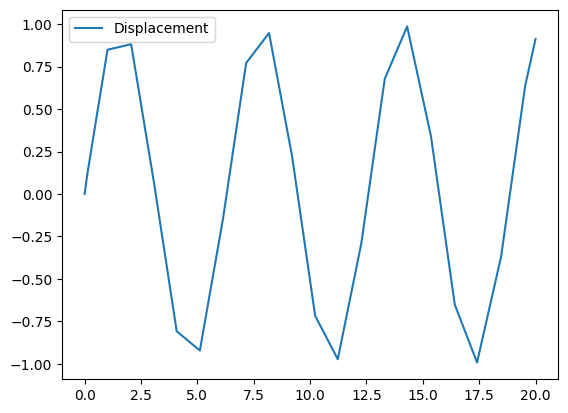

In [3]:
sol = scpy.solve_ivp(yprime, t, y0, atol=1e-5, rtol=1e-5)
plt.plot(sol.t, sol.y[0], label='Displacement')
plt.legend()

### Variation of `rtol` keeping `atol` constant

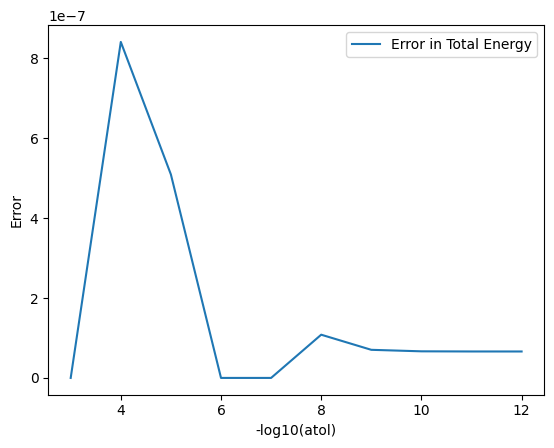

In [4]:
error1 = np.zeros_like(atol)
for i in range(np.size(atol)):
    sol = scpy.solve_ivp(yprime, t, y0, atol=atol[i], rtol=1e-5)
    error1[i] = np.max(np.sin(sol.t) - sol.y)
plt.plot(-np.log10(atol), error1, label='Error in Total Energy')
plt.xlabel("-log10(atol)")
plt.ylabel('Error')
plt.legend()

### Variation of `rtol` keeping `rtol` constant 

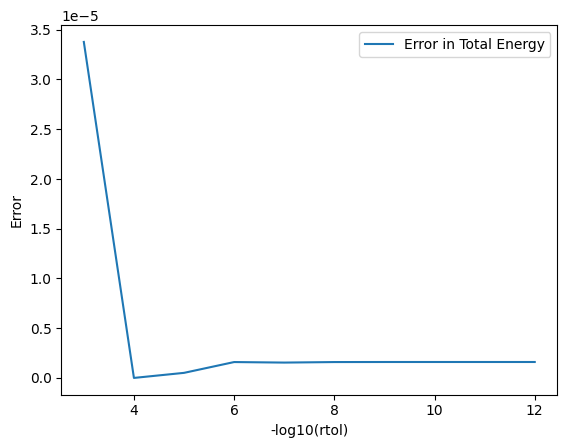

In [5]:
error1 = np.zeros_like(atol)
for i in range(np.size(atol)):
    sol = scpy.solve_ivp(yprime, t, y0, rtol=rtol[i], atol=1e-5)
    error1[i] = np.max(np.sin(sol.t) - sol.y)
plt.plot(-np.log10(atol), error1, label='Error in Total Energy')
plt.xlabel("-log10(rtol)")
plt.ylabel('Error')
plt.legend()

### Variation of both `atol` and `rtol` 

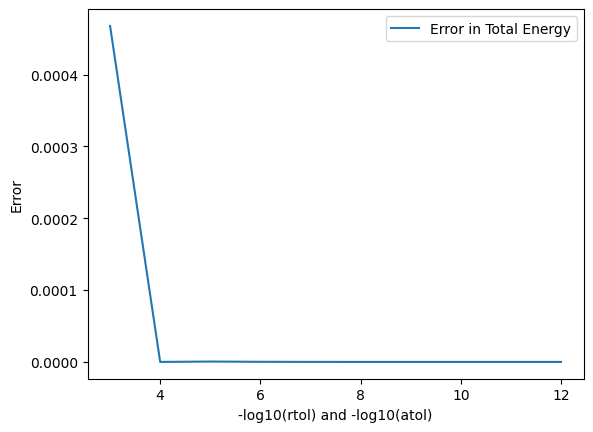

In [6]:
error1 = np.zeros_like(atol)
for i in range(np.size(atol)):
    sol = scpy.solve_ivp(yprime, t, y0, rtol=rtol[i], atol=atol[i])
    error1[i] = np.max(np.sin(sol.t) - sol.y)
plt.plot(-np.log10(atol), error1, label='Error in Total Energy')
plt.xlabel("-log10(rtol) and -log10(atol)")
plt.ylabel('Error')
plt.legend()

In [7]:
### Solution with the values of `atol`=1e-12, `rtol`=1e-12

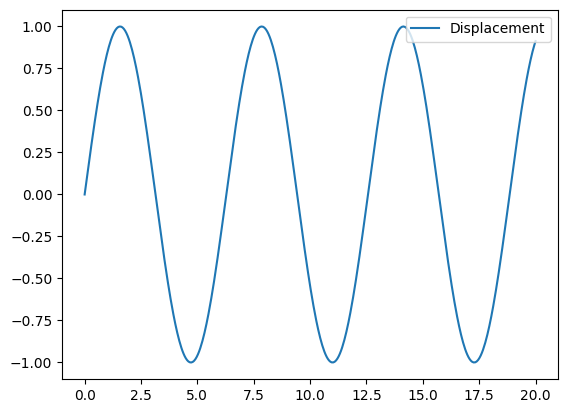

In [8]:
sol = scpy.solve_ivp(yprime, t, y0, atol=1e-12, rtol=1e-12)
plt.plot(sol.t, sol.y[0], label='Displacement')
plt.legend()

## Problem 2: Solving a coupled ODE

### Solution with default values of `atol`=1e-5, `rtol`=1e-5

In [9]:
y0 = np.array([2, 1])
t=[0,20]
def yprime(t,y):
    return np.dot(y,np.array([[-3, 5], [-5, 3]])) # [[a11, a21], [a12, a22]]

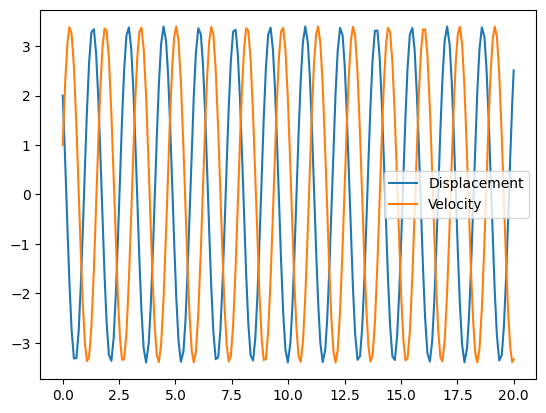

In [10]:
sol = scpy.solve_ivp(yprime, t, y0, atol=1e-5, rtol=1e-5)
plt.plot(sol.t, sol.y[0], label='Displacement')
plt.plot(sol.t, sol.y[1], label='Velocity')
plt.legend()

### Variation of `atol` while keeping `rtol` constant

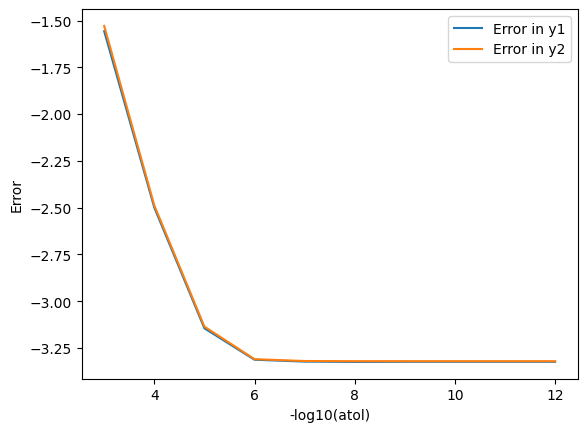

In [11]:
error1 = np.zeros_like(atol)
error2 = np.zeros_like(atol)
for i in range(np.size(atol)):
    sol = scpy.solve_ivp(yprime, t, y0, atol=atol[i], rtol=1e-5)
    y1 = 2*np.cos(4*sol.t) - 2.75*np.sin(4*sol.t)
    y2 = 3.25*np.sin(4*sol.t) + np.cos(4*sol.t)
    error1[i] = np.max(y1 - sol.y[0])
    error2[i] = np.max(y2 - sol.y[1])
plt.plot(-np.log10(atol), np.log10(error1), label='Error in y1')
plt.plot(-np.log10(atol), np.log10(error2), label='Error in y2')
plt.xlabel("-log10(atol)")
plt.ylabel('Error')
plt.legend()

### Variation of `rtol` while keeping `atol` constant

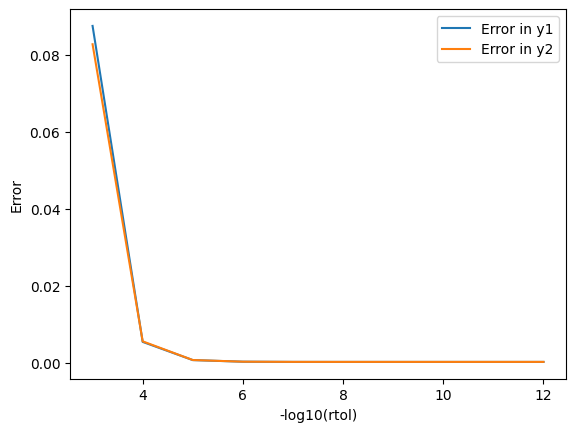

In [12]:
error1 = np.zeros_like(atol)
error2 = np.zeros_like(atol)
for i in range(np.size(atol)):
    sol = scpy.solve_ivp(yprime, t, y0, rtol=rtol[i], atol=1e-5)
    y1 = 2*np.cos(4*sol.t) - 2.75*np.sin(4*sol.t)
    y2 = 3.25*np.sin(4*sol.t) + np.cos(4*sol.t)
    error1[i] = np.max(y1 - sol.y[0])
    error2[i] = np.max(y2 - sol.y[1])
plt.plot(-np.log10(atol), error1, label='Error in y1')
plt.plot(-np.log10(atol), error2, label='Error in y2')
plt.xlabel("-log10(rtol)")
plt.ylabel('Error')
plt.legend()

### Variation of both `atol` and `rtol` 

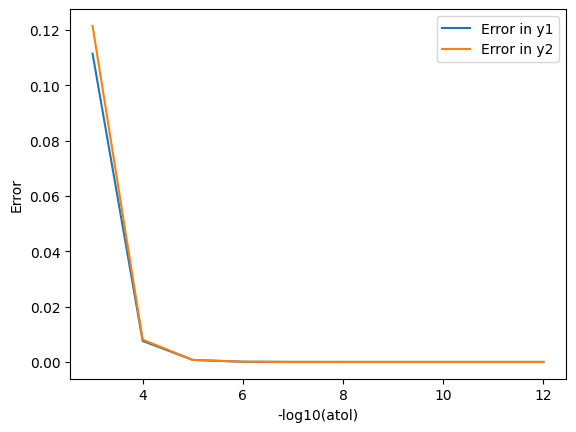

In [13]:
error1 = np.zeros_like(atol)
error2 = np.zeros_like(atol)
for i in range(np.size(atol)):
    sol = scpy.solve_ivp(yprime, t, y0, atol=atol[i], rtol=rtol[i])
    y1 = 2*np.cos(4*sol.t) - 2.75*np.sin(4*sol.t)
    y2 = 3.25*np.sin(4*sol.t) + np.cos(4*sol.t)
    error1[i] = np.max(y1 - sol.y[0])
    error2[i] = np.max(y2 - sol.y[1])
plt.plot(-np.log10(atol), error1, label='Error in y1')
plt.plot(-np.log10(atol), error2, label='Error in y2')
plt.xlabel("-log10(atol)")
plt.ylabel('Error')
plt.legend()

In [14]:
### Solution with the values of `atol`=1e-12, `rtol`=1e-12

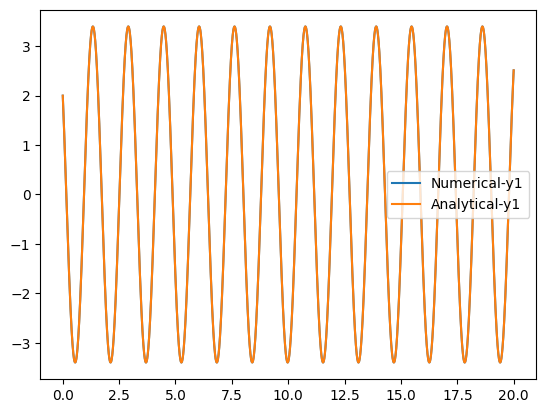

In [15]:
sol = scpy.solve_ivp(yprime, t, y0, atol=1e-12, rtol=1e-12)
plt.plot(sol.t, sol.y[0], label='Numerical-y1')
plt.plot(sol.t, y1, label='Analytical-y1')
plt.legend()

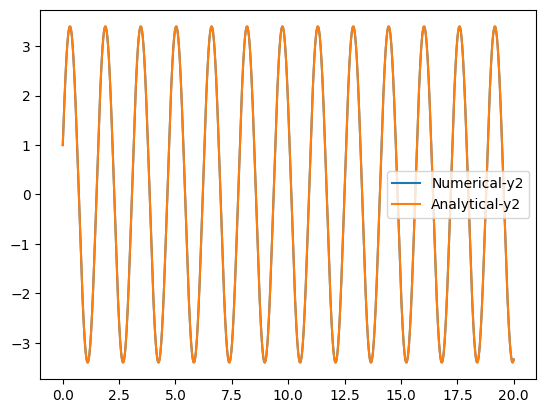

In [16]:
plt.plot(sol.t, sol.y[1], label='Numerical-y2')
plt.plot(sol.t, y2, label='Analytical-y2')
plt.legend()

## Problem 3: Simple Pendulum

In [17]:
y0 = np.array([np.pi/6,0]) # stable position theta = 0
t = [0,20]            
m, l, g, = 1, 10, 9.8
def yprime(t,y):
    return np.array([y[1], -g/l*np.sin(y[0])])

### Solution with default values of `atol`=1e-5, `rtol`=1e-5

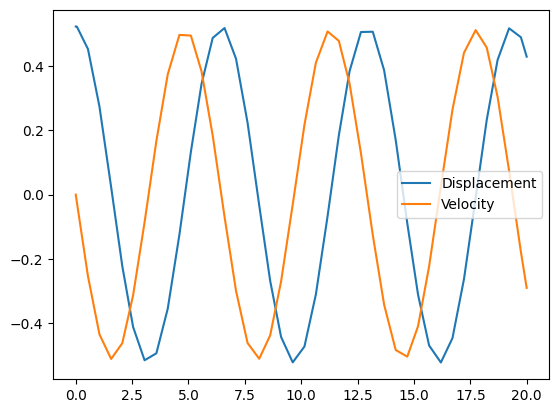

In [18]:
sol = scpy.solve_ivp(yprime, t, y0, atol=1e-5, rtol=1e-5)
plt.plot(sol.t, sol.y[0], label='Displacement')
plt.plot(sol.t, sol.y[1], label='Velocity')
plt.legend()

### Variation of error with `atol` keeping `rtol` constant

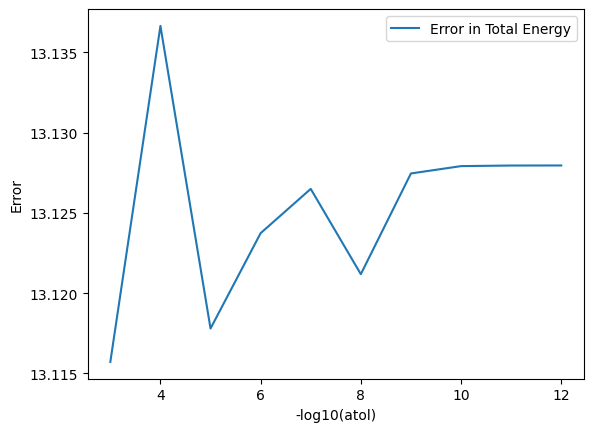

In [19]:
error1 = np.zeros_like(atol)
for i in range(np.size(atol)):
    sol = scpy.solve_ivp(yprime, t, y0, atol=atol[i], rtol=1e-5)
    E = m*l*l*np.square(sol.y[1]) + m*g*l*(np.ones_like(sol.y[0]) - np.cos(sol.y[0]))
    error1[i] = np.max(E)-np.min(E)
plt.plot(-np.log10(atol), error1, label='Error in Total Energy')
plt.xlabel("-log10(atol)")
plt.ylabel('Error')
plt.legend()

### Variation of error with `rtol` keeping `atol` constant

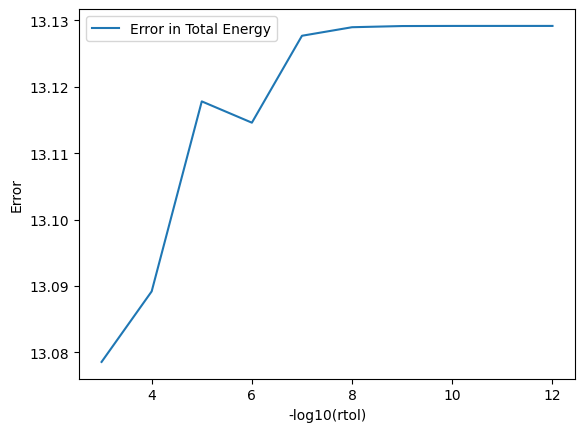

In [20]:
error1 = np.zeros_like(atol)
for i in range(np.size(atol)):
    sol = scpy.solve_ivp(yprime, t, y0, rtol=rtol[i], atol=1e-5)
    E = m*l*l*np.square(sol.y[1]) + m*g*l*(np.ones_like(sol.y[0]) - np.cos(sol.y[0]))
    error1[i] = np.max(E)-np.min(E)
plt.plot(-np.log10(atol), error1, label='Error in Total Energy')
plt.xlabel("-log10(rtol)")
plt.ylabel('Error')
plt.legend()

### Variation of error with both `atol` and `rtol`

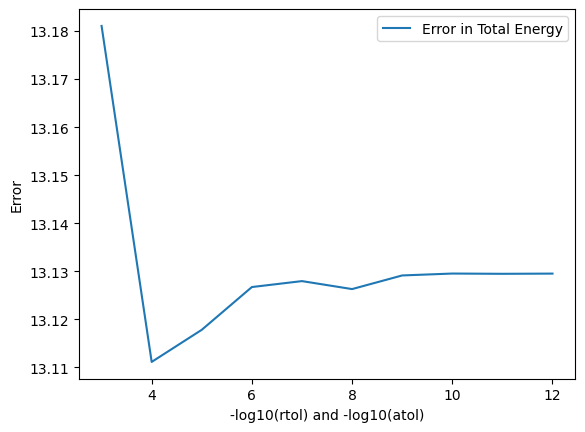

In [21]:
error1 = np.zeros_like(atol)
for i in range(np.size(atol)):
    sol = scpy.solve_ivp(yprime, t, y0, rtol=rtol[i], atol=atol[i])
    E = m*l*l*np.square(sol.y[1]) + m*g*l*(np.ones_like(sol.y[0]) - np.cos(sol.y[0]))
    error1[i] = np.max(E)-np.min(E)
plt.plot(-np.log10(atol), error1, label='Error in Total Energy')
plt.xlabel("-log10(rtol) and -log10(atol)")
plt.ylabel('Error')
plt.legend()

### Solution with default values of `atol`=1e-12, `rtol`=1e-12

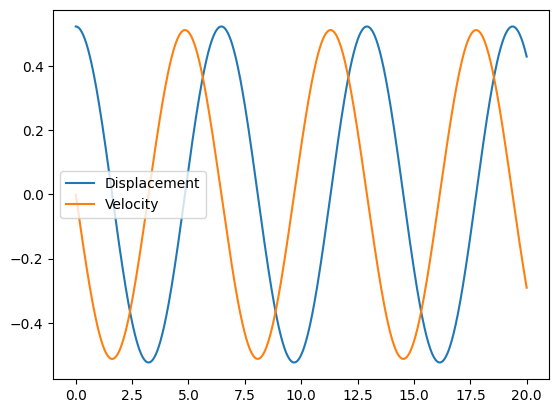

In [22]:
sol = scpy.solve_ivp(yprime, t, y0, atol=1e-12, rtol=1e-12)
plt.plot(sol.t, sol.y[0], label='Displacement')
plt.plot(sol.t, sol.y[1], label='Velocity')
plt.legend()